# TP2 : Séparateurs à Vaste Marge

## 1/ Données

In [1]:
import numpy as np

def load_breastcancer(filename):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'wdbc_M1_B0.data'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(filename, delimiter=',')

    # la colonne 0 ne nous interesse pas ici
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y

In [5]:
X, y = load_breastcancer("wdbcM1B0.data")

## 2/ Méthode du sous-gradient 

### Q 2.1/
Let $\Xi_i (v,a) = [max(0, 1-y_i(x_i^T v+ a); + \infty[$

Let $\Xi (v,a) = \prod_i \Xi_i (v,a)$

$\forall$ $v \in R_m$, $a \in R$, $\xi \in \Xi (v,a)$, $\space$ let $f(v, a, \xi) = \frac{1}{2} \sum_j v_j^2 + \sum_i \xi_i$. $f$ is an increasing function of $\xi_i \space \forall i$ (and for all $v, a, \xi_j (j\ne i)$  fixed).

And let $\xi_{min} = (\xi_{{min}_i})_i$ where $\xi_{min_i} = max(0, 1-y_i(x_i^T v+ a)$

We have : $\forall$ $v \in R_m$, $a \in R$, $\xi \in \Xi (v,a)$, $f(v, a, \xi) \ge f(v, a, \xi_{min})$. (Because $f$ is an increasing function of $\xi_i \space \forall i$.)

Therefore, $min_{v,a,\xi} f(v,a,\xi) \ge min_{v,a,\xi} f(v, a, \xi_{min}) = min_{v,a} f(v, a, \xi_{min})$

We proved the first inequality : $min_{v,a,\xi} f(v,a,\xi) \ge min_{v,a} f(v, a, \xi_{min})$

As it holds that, for any function $g$ which admits a minimum, $\forall bo \in B, min_{a\in A, b \in B} g(a,b) \le min_{a \in A} g(a,bo)$ 

With $g = f$ and $\xi o = \xi_{min}$, $min_{v,a,\xi} f(v,a,\xi) \le min_{v,a} f(v, a, \xi_{min})$


Therefore the problem 1 is equivalent to the problem 2 !

And we define $f(v, a) = f(v, a, \xi_{min})$

### Q 2.2/

In [10]:
import matplotlib.pyplot as plt

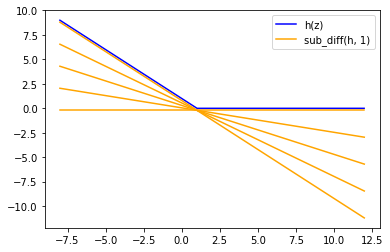

In [36]:
def h(z):
    return np.maximum(np.zeros(z.shape),1-z)

z = np.arange(-8,12,0.01)
plt.plot(z, h(z), color = 'blue', label = "h(z)")
plt.plot([-8,12], [-0.2,-.2], color = 'orange', label = "sub_diff(h, 1)")
plt.plot([-8,12], [8.8, -11.2], color = 'orange')
plt.plot([-8,12], [4.3, -5.7], color = 'orange')
plt.plot([-8,12], [9*3/4-0.2,-11*3/4 -0.2], color = 'orange')
plt.plot([-8,12], [9/4-0.2,-11/4 -0.2], color = 'orange')
plt.legend()
plt.show()

The function is linear and therefore derivable for z != 1. So $\partial h(z) = \frac{dh}{dz} (z)$.

And for z = 1, we can see that all the slopes between minus 1 and 0 fits the definition.

### Q 2.3/

Let $N(w) = \sum_{j=1}^{m+1} N_j(w_j)$. With $\forall j \in [1;m], N_j(w_j) = \frac{1}{2}w_j^2$ and $N_{m+1} = 0$. N is separable.

Then with $w = (v,a), N(v,a) = \sum_j v_j^2$.

Let $M = 
\begin{pmatrix}
y_{1} & & \\
& \ddots & \\
& & y_{n}
\end{pmatrix} \begin{pmatrix} 
X &  \begin{pmatrix} 1\\\vdots\\1 \end{pmatrix}
\end{pmatrix}$.

$M \begin{pmatrix} v\\a \end{pmatrix} = \begin{pmatrix}y_0(x_0^Tv + a)\\ \vdots \\ y_n(x_n^Tv +a) \end{pmatrix}$

Then let $H(x) = \sum_{i=1}^n h(x_i)$. With $h(z) = max(0,1-z)$. H is separable.

And $H(M(v,a)) = \sum_i max(0, 1-y_i(x_i^Tv +a))$ and then $f(v,a) = N(v,a) + cH(M(v,a))$

Moreover we have $0 \in r_i(Mdom(N) - dom(H))$ as $dom(N) = R_m$.

So $\partial f(v,a) = \partial N(v,a) + cM^T \partial H (M(v,a)).$

N can be derivate : $\partial N(v,a) = (v, 0)$

And H is a separable function : $\partial H(M(v,a)) = \prod_i \partial h(M_i(v,a))$

### Q 2.4/

In [41]:
c = 1
def N(v,a):
    return 0.5 * np.sum(v**2)
def H(X):
    

def f(v,a):
    return 0.5 * np.sum(v**2) + c *  np.sum(np.max(0,1-np.diag(y)*(np.dot(X,v) + a)))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,
        1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,
        1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1